In [1]:
import pandas as pd

In [6]:
# 파일 불러오기
file_path = "./files/df_20TABLE_kor_명세서일반내역.xlsx"
df20 = pd.read_excel(file_path)
df20

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [7]:
df20_c = df20[['명세서 연결코드', '수진자고유번호', '수진자연령', '성별구분코드', '요양개시일자', \
               '수술여부', '심결본인부담금', '심결보험자부담금', '심결요양급여비용총액',\
               '진료과목코드']]
df20_c

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드
0,1,169,62,1,20130108,0,2800,6630,9430,1
1,2,183,74,2,20130212,0,500,3880,4380,0
2,3,23,14,1,20130222,0,1300,2010,3310,3
3,4,96,68,1,20130608,0,7900,18760,26660,54
4,5,28,19,1,20131128,0,2800,6630,9430,1
...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,9,2,20131001,0,3900,9410,13310,56
5627,5628,295,20,1,20130423,0,3500,67810,71310,1
5628,5629,246,4,1,20130112,0,2900,10920,13820,11
5629,5630,253,47,2,20130401,0,2800,6630,9430,5


In [16]:
#### 연령대 생성
df20_c['연령대'] = 'x'

for j in range(0, 100, 10) : 
    if j == 0 :
        row_index = df20_c.index[df20_c['수진자연령'] < j+10]
        df20_c.loc[row_index, '연령대'] = '9세이하'


    if j >= 10 :
        row_index = df20_c.index[(df20_c['수진자연령'] >= j) & (df20_c['수진자연령'] < j+10)]
        df20_c.loc[row_index, '연령대'] = '{}대'.format(j)
        
df20_c

C:\Users\admin\AppData\Local\Temp\ipykernel_3552\1541423332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_c['연령대'] = 'x'


,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드,연령대
0,1,169,62,1,20130108,0,2800,6630,9430,1,60대
1,2,183,74,2,20130212,0,500,3880,4380,0,70대
2,3,23,14,1,20130222,0,1300,2010,3310,3,10대
3,4,96,68,1,20130608,0,7900,18760,26660,54,60대
4,5,28,19,1,20131128,0,2800,6630,9430,1,10대
...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,9,2,20131001,0,3900,9410,13310,56,9세이하
5627,5628,295,20,1,20130423,0,3500,67810,71310,1,20대
5628,5629,246,4,1,20130112,0,2900,10920,13820,11,9세이하
5629,5630,253,47,2,20130401,0,2800,6630,9430,5,40대


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

In [24]:
### 수술여부 및 연령별에 따른 의료비용 현황

In [25]:
# 수술여부 및 연령별에 따른 의료비용 현황
'''
수술여부 및 연령별에 따른 부담금을 알아보기 위해
진료과목별 요양급여비총액 현황 파악이 우선되어야 한다
** 금액별 편차가 크기 때문에 진료과목별 금액 파악이 필요함
'''

'\n수술여부 및 연령별에 따른 부담금을 알아보기 위해\n진료과목별 요양급여비총액 현황 파악이 우선되어야 한다\n** 금액별 편차가 크기 때문에 진료과목별 금액 파악이 필요함\n'

In [17]:
file_path = 'C:/DEV/STUDY/StudyPython22.06/day7/files/표본자료 변수 테이블(2012-2013).xlsx'
df20_hcode = pd.read_excel(file_path, sheet_name = '표1.표2.표3.표4.', usecols='B,C', skiprows=[0,1], skipfooter=33)
df20_hcode.columns = ['진료과목코드','진료과목']
df20_hcode

,진료과목코드,진료과목
0,0,일반의
1,1,내과
2,2,신경과
3,3,정신과
4,4,외과
5,5,정형외과
6,6,신경외과
7,7,흉부외과
8,8,성형외과
9,9,마취통증의학과


In [18]:
df20_merge = pd.merge(df20_c,df20_hcode)
df20_merge

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드,연령대,진료과목
0,1,169,62,1,20130108,0,2800,6630,9430,1,60대,내과
1,5,28,19,1,20131128,0,2800,6630,9430,1,10대,내과
2,12,115,6,1,20130129,0,2800,6630,9430,1,9세이하,내과
3,15,256,35,2,20130930,0,2800,6630,9430,1,30대,내과
4,18,267,53,1,20130125,0,10300,24250,34550,1,50대,내과
...,...,...,...,...,...,...,...,...,...,...,...,...
5626,1907,261,28,2,20130326,0,7400,17340,24740,16,20대,영상의학과
5627,2921,312,69,2,20131030,0,1500,7930,9430,16,60대,영상의학과
5628,4975,218,41,1,20130902,0,18100,42350,60450,16,40대,영상의학과
5629,5566,312,69,2,20131012,0,0,0,0,16,60대,영상의학과


In [28]:
### 진료 순위 top10 (사람들이 진료를 많이 본 과목)

In [19]:
# 사람들이 진료를 많이 본 과목
df20_merge['진료과목'].value_counts().sort_values(ascending=False).head(5)

내과        1808
정형외과       755
소아청소년과     468
이비인후과      358
피부과        269
Name: 진료과목, dtype: int64

In [20]:
m_top10 = ['내과','정형외과','소아청소년과','이비인후과','피부과','안과','가정의학과','치과보존과','외과','마취통증의학과']
df_m_top10 = pd.DataFrame()

for i in m_top10 :
    a = df20_merge[df20_merge['진료과목'] == i]
    df_m_top10 = pd.concat([df_m_top10, a], ignore_index=True)
    
df_m_top10


,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드,연령대,진료과목
0,1,169,62,1,20130108,0,2800,6630,9430,1,60대,내과
1,5,28,19,1,20131128,0,2800,6630,9430,1,10대,내과
2,12,115,6,1,20130129,0,2800,6630,9430,1,9세이하,내과
3,15,256,35,2,20130930,0,2800,6630,9430,1,30대,내과
4,18,267,53,1,20130125,0,10300,24250,34550,1,50대,내과
...,...,...,...,...,...,...,...,...,...,...,...,...
4712,5381,270,59,2,20130319,0,9400,22150,31550,9,50대,마취통증의학과
4713,5466,281,61,2,20130712,0,4700,10990,15690,9,60대,마취통증의학과
4714,5493,270,59,2,20130531,0,3400,8140,11540,9,50대,마취통증의학과
4715,5559,211,65,2,20130612,0,1500,7930,9430,9,60대,마취통증의학과


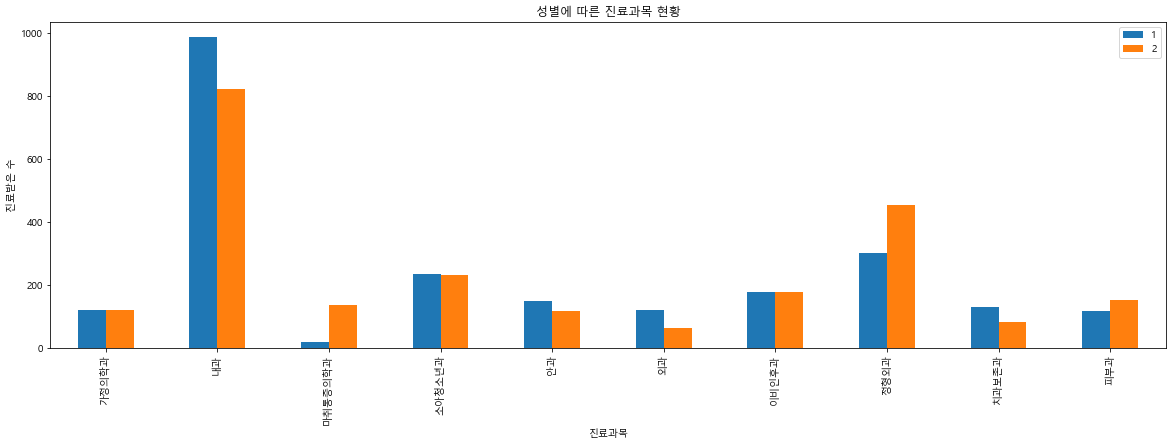

In [21]:
# 성별에 따른 진료과목 현황

pivot_sex_age_m = df_m_top10.pivot_table(values = '명세서 연결코드', index = '진료과목', columns = '성별구분코드', aggfunc = 'count')
pivot_sex_age_m = pivot_sex_age_m.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_sex_age_m.plot.bar()

plt.title('성별에 따른 진료과목 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()


In [ ]:
'''
내과를 진료받은 환자수가 제일 많고 그 다음으로는 정형외과가 많습니다.
성별에 따라서 진료과목의 차이는 크게 보이지않습니다.
'''

In [22]:
pivot_sex_age_m

성별구분코드,1,2
진료과목,,
가정의학과,121,120
내과,986,822
마취통증의학과,18,136
소아청소년과,235,233
안과,151,117
외과,120,63
이비인후과,179,179
정형외과,301,454
치과보존과,130,83


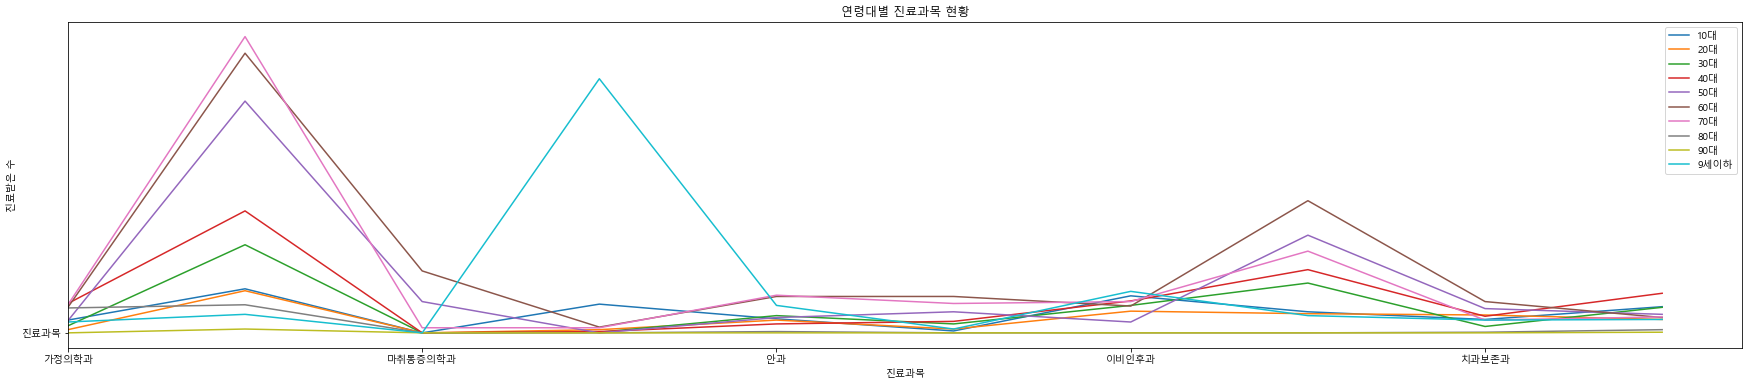

In [23]:
# 연령별에 따른 진료과목 현황
pivot_age_m = df_m_top10.pivot_table(values = '명세서 연결코드', index = '진료과목', columns = '연령대', aggfunc = 'count')
pivot_age_m = pivot_age_m.fillna(0)

plt.rcParams['figure.figsize'] = (30,6)
pivot_age_m.plot()
plt.barh('진료과목','연령대')

plt.title('연령대별 진료과목 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()

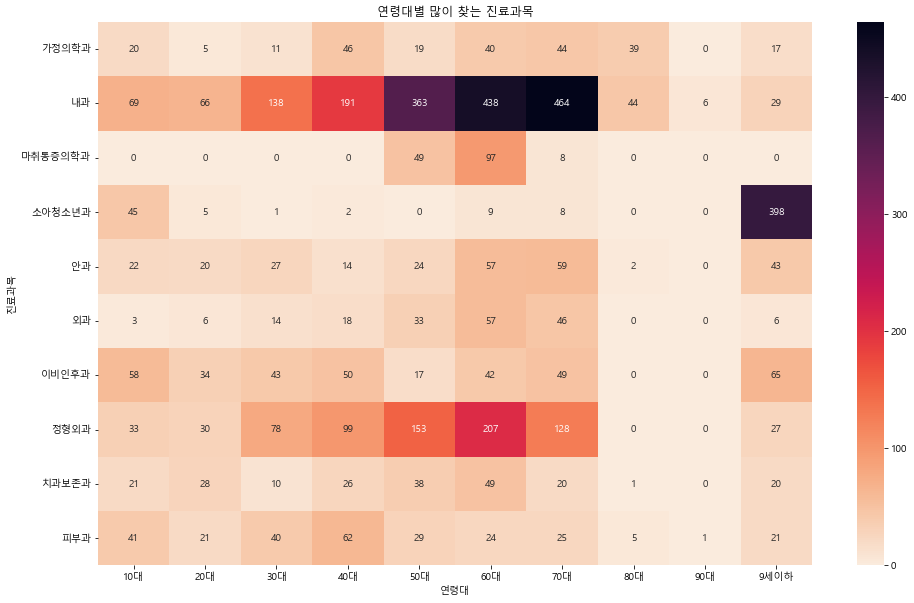

In [24]:
plt.figure(figsize = (16,10))
sns.heatmap(pivot_age_m, annot=True, fmt = '.0f', cmap='rocket_r')
plt.title('연령대별 많이 찾는 진료과목')
plt.show()

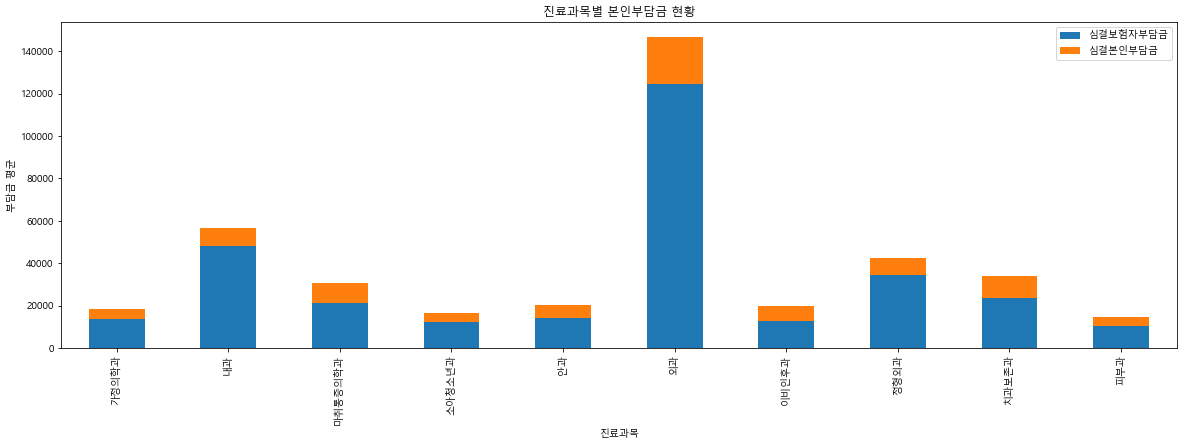

In [25]:
### 진료과목별 부담금 현황
# 진료과목별 본인부담금 현황
pivot_pay_m = df_m_top10.pivot_table(values = ['심결본인부담금','심결보험자부담금'], index = '진료과목', aggfunc = 'mean')
pivot_pay_m = pivot_pay_m.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_pay_m.plot.bar(stacked=True)

plt.title('진료과목별 본인부담금 현황')
plt.ylabel('부담금 평균')
plt.legend(loc='upper right')

plt.show()

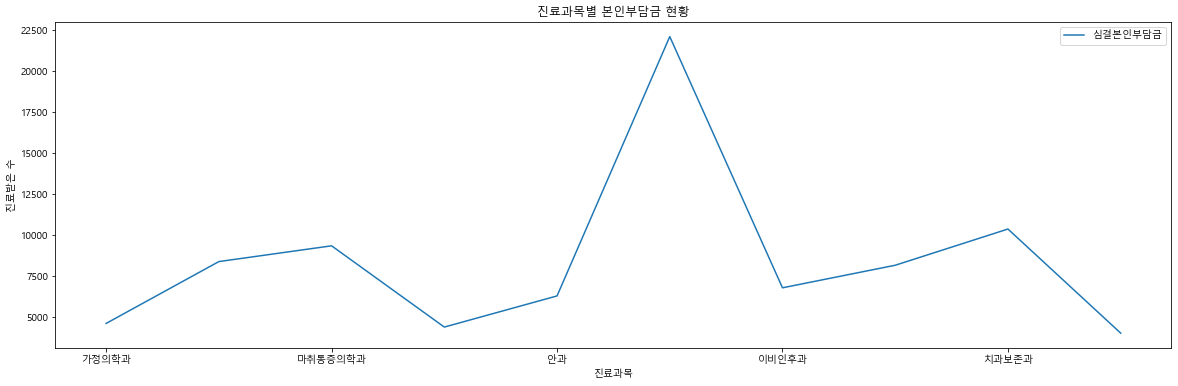

In [26]:
#### 진료과목별 본인부담금 현황
# 진료과목별 본인부담금 현황
pivot_pay_m1 = df_m_top10.pivot_table(values = '심결본인부담금', index = '진료과목', aggfunc = 'mean')
pivot_pay_m1 = pivot_pay_m1.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_pay_m1.plot()

plt.title('진료과목별 본인부담금 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()

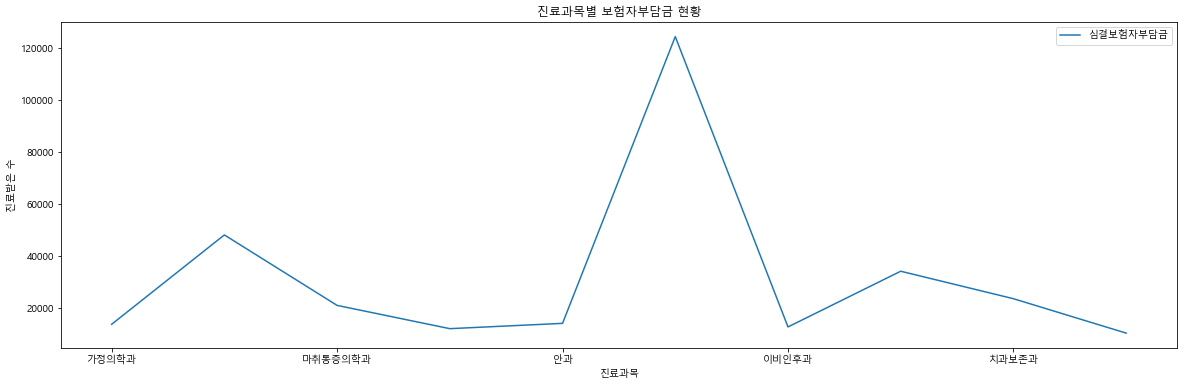

In [27]:
### 진료과목별 보험자부담금 현황
# 진료과목별 보험자부담금 현황
pivot_pay_m2 = df_m_top10.pivot_table(values = '심결보험자부담금', index = '진료과목', aggfunc = 'mean')
pivot_pay_m2 = pivot_pay_m2.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_pay_m2.plot()

plt.title('진료과목별 보험자부담금 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()